In [1]:
import cv2
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mnist import MNIST

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LeakyReLU
from keras.utils import plot_model, to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder


# loading the original MNIST hand-written digits
mndata = MNIST('')
mndata.gz = True

images, labels = mndata.load_training()

Using TensorFlow backend.
c:\users\ip_pr\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\ip_pr\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\ip_pr\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

(60000, 28, 28)


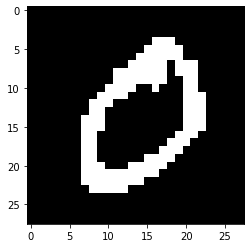

In [2]:
imgs = np.asarray(images)
imgs = np.reshape(imgs, (-1, 28, 28))
# thresholds imgs
imgs = np.where(imgs < 100, 0, 255)
print(imgs.shape)

plt.imshow(imgs[1], cmap='gray')
plt.show()

In [3]:
def cnn_model():
    model = Sequential()

    model.add(Conv2D(14, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(28, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(784, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(10, activation='softmax'))

    opt = keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    return model

model = cnn_model()
model.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
keep_dims is deprecated, use keepdims instead

Instructions for updating:
keep_dims is deprecated, use keepdims instead

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 14)        140       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 14)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 14)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 28)          9828      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 28)          0         
_______

In [4]:
# X_train = np.array(imgs).reshape(-1,28,28,1)

# onehot_encoder = OneHotEncoder(sparse=False, categories='auto')
# y_train = onehot_encoder.fit_transform(np.reshape(labels, (-1, 1)))

# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(imgs, labels, test_size=0.30, random_state=0, stratify=labels)
X_train = np.array(X_train)/255
X_test = np.array(X_test)/255

X_train = np.array(X_train).reshape(-1,28,28,1)
X_test = np.array(X_test).reshape(-1,28,28,1)

onehot_encoder = OneHotEncoder(sparse=False, categories='auto')
y_train = onehot_encoder.fit_transform(np.reshape(y_train, (-1,1)))
y_test = onehot_encoder.transform(np.reshape(y_test, (-1,1)))

In [5]:
history = model.fit(X_train, y_train, batch_size=1000, epochs=30)
model.save('cnn.h5')
# score = model.evaluate(X_test, y_test, batch_size=1000)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/30
42000/42000 [==============================] - ETA: 25s - loss: 2.3569 - acc: 0.11 - ETA: 16s - loss: 2.3266 - acc: 0.12 - ETA: 13s - loss: 2.2983 - acc: 0.14 - ETA: 12s - loss: 2.2777 - acc: 0.15 - ETA: 11s - loss: 2.2551 - acc: 0.17 - ETA: 10s - loss: 2.2299 - acc: 0.19 - ETA: 9s - loss: 2.2050 - acc: 0.2201 - ETA: 9s - loss: 2.1738 - acc: 0.246 - ETA: 8s - loss: 2.1429 - acc: 0.266 - ETA: 8s - loss: 2.1116 - acc: 0.284 - ETA: 8s - loss: 2.0782 - acc: 0.303 - ETA: 7s - loss: 2.0413 - acc: 0.321 - ETA: 7s - loss: 2.0030 - acc: 0.337 - ETA: 7s - loss: 1.9633 - acc: 0.354 - ETA: 6s - loss: 1.9228 - acc: 0.368 - ETA: 6s - loss: 1.8868 - acc: 0.380 - ETA: 6s - loss: 1.8486 - acc: 0.393 - ETA: 6s - loss: 1.8116 - acc: 0.405 - ETA: 5s - loss: 1.7780 - acc: 0.416 - ETA: 5

42000/42000 [==============================] - ETA: 31s - loss: 0.2384 - acc: 0.93 - ETA: 30s - loss: 0.2507 - acc: 0.92 - ETA: 29s - loss: 0.2341 - acc: 0.93 - ETA: 29s - loss: 0.2318 - acc: 0.93 - ETA: 28s - loss: 0.2459 - acc: 0.92 - ETA: 27s - loss: 0.2469 - acc: 0.92 - ETA: 26s - loss: 0.2453 - acc: 0.92 - ETA: 25s - loss: 0.2466 - acc: 0.92 - ETA: 24s - loss: 0.2411 - acc: 0.92 - ETA: 23s - loss: 0.2388 - acc: 0.92 - ETA: 22s - loss: 0.2366 - acc: 0.92 - ETA: 21s - loss: 0.2397 - acc: 0.92 - ETA: 20s - loss: 0.2381 - acc: 0.92 - ETA: 19s - loss: 0.2358 - acc: 0.92 - ETA: 18s - loss: 0.2339 - acc: 0.92 - ETA: 17s - loss: 0.2320 - acc: 0.92 - ETA: 16s - loss: 0.2321 - acc: 0.92 - ETA: 16s - loss: 0.2334 - acc: 0.92 - ETA: 15s - loss: 0.2337 - acc: 0.92 - ETA: 14s - loss: 0.2328 - acc: 0.92 - ETA: 13s - loss: 0.2318 - acc: 0.92 - ETA: 12s - loss: 0.2317 - acc: 0.92 - ETA: 11s - loss: 0.2327 - acc: 0.92 - ETA: 11s - loss: 0.2315 - acc: 0.92 - ETA: 10s - loss: 0.2311 - acc: 0.92 - ETA

42000/42000 [==============================] - ETA: 15s - loss: 0.1516 - acc: 0.95 - ETA: 14s - loss: 0.1603 - acc: 0.94 - ETA: 14s - loss: 0.1613 - acc: 0.94 - ETA: 13s - loss: 0.1598 - acc: 0.94 - ETA: 12s - loss: 0.1612 - acc: 0.94 - ETA: 11s - loss: 0.1618 - acc: 0.95 - ETA: 11s - loss: 0.1559 - acc: 0.95 - ETA: 10s - loss: 0.1577 - acc: 0.95 - ETA: 9s - loss: 0.1555 - acc: 0.9524 - ETA: 9s - loss: 0.1543 - acc: 0.952 - ETA: 8s - loss: 0.1541 - acc: 0.952 - ETA: 8s - loss: 0.1544 - acc: 0.952 - ETA: 8s - loss: 0.1543 - acc: 0.952 - ETA: 7s - loss: 0.1557 - acc: 0.951 - ETA: 7s - loss: 0.1553 - acc: 0.951 - ETA: 6s - loss: 0.1533 - acc: 0.952 - ETA: 6s - loss: 0.1529 - acc: 0.952 - ETA: 6s - loss: 0.1541 - acc: 0.951 - ETA: 6s - loss: 0.1538 - acc: 0.951 - ETA: 6s - loss: 0.1537 - acc: 0.951 - ETA: 5s - loss: 0.1542 - acc: 0.951 - ETA: 5s - loss: 0.1552 - acc: 0.951 - ETA: 5s - loss: 0.1554 - acc: 0.950 - ETA: 5s - loss: 0.1560 - acc: 0.950 - ETA: 5s - loss: 0.1578 - acc: 0.950 - ET

42000/42000 [==============================] - ETA: 14s - loss: 0.1073 - acc: 0.96 - ETA: 14s - loss: 0.1385 - acc: 0.95 - ETA: 14s - loss: 0.1396 - acc: 0.95 - ETA: 12s - loss: 0.1403 - acc: 0.95 - ETA: 11s - loss: 0.1358 - acc: 0.95 - ETA: 10s - loss: 0.1330 - acc: 0.95 - ETA: 9s - loss: 0.1378 - acc: 0.9569 - ETA: 9s - loss: 0.1387 - acc: 0.955 - ETA: 8s - loss: 0.1382 - acc: 0.956 - ETA: 8s - loss: 0.1359 - acc: 0.957 - ETA: 8s - loss: 0.1358 - acc: 0.956 - ETA: 7s - loss: 0.1368 - acc: 0.956 - ETA: 7s - loss: 0.1349 - acc: 0.956 - ETA: 7s - loss: 0.1364 - acc: 0.956 - ETA: 6s - loss: 0.1346 - acc: 0.956 - ETA: 6s - loss: 0.1365 - acc: 0.956 - ETA: 6s - loss: 0.1360 - acc: 0.956 - ETA: 6s - loss: 0.1365 - acc: 0.956 - ETA: 5s - loss: 0.1352 - acc: 0.956 - ETA: 5s - loss: 0.1379 - acc: 0.956 - ETA: 5s - loss: 0.1371 - acc: 0.956 - ETA: 4s - loss: 0.1370 - acc: 0.956 - ETA: 4s - loss: 0.1362 - acc: 0.957 - ETA: 4s - loss: 0.1376 - acc: 0.957 - ETA: 4s - loss: 0.1379 - acc: 0.957 - ET

42000/42000 [==============================] - ETA: 9s - loss: 0.1240 - acc: 0.953 - ETA: 9s - loss: 0.1279 - acc: 0.956 - ETA: 9s - loss: 0.1159 - acc: 0.963 - ETA: 10s - loss: 0.1213 - acc: 0.96 - ETA: 10s - loss: 0.1199 - acc: 0.96 - ETA: 11s - loss: 0.1174 - acc: 0.96 - ETA: 11s - loss: 0.1151 - acc: 0.96 - ETA: 10s - loss: 0.1139 - acc: 0.96 - ETA: 10s - loss: 0.1135 - acc: 0.96 - ETA: 10s - loss: 0.1159 - acc: 0.96 - ETA: 9s - loss: 0.1163 - acc: 0.9623 - ETA: 9s - loss: 0.1173 - acc: 0.961 - ETA: 8s - loss: 0.1176 - acc: 0.961 - ETA: 8s - loss: 0.1178 - acc: 0.962 - ETA: 8s - loss: 0.1163 - acc: 0.962 - ETA: 7s - loss: 0.1167 - acc: 0.962 - ETA: 7s - loss: 0.1157 - acc: 0.963 - ETA: 6s - loss: 0.1161 - acc: 0.962 - ETA: 6s - loss: 0.1177 - acc: 0.962 - ETA: 6s - loss: 0.1187 - acc: 0.962 - ETA: 5s - loss: 0.1185 - acc: 0.962 - ETA: 5s - loss: 0.1183 - acc: 0.962 - ETA: 5s - loss: 0.1173 - acc: 0.962 - ETA: 4s - loss: 0.1176 - acc: 0.962 - ETA: 4s - loss: 0.1167 - acc: 0.962 - ET

42000/42000 [==============================] - ETA: 9s - loss: 0.0994 - acc: 0.969 - ETA: 9s - loss: 0.1021 - acc: 0.968 - ETA: 9s - loss: 0.1006 - acc: 0.969 - ETA: 8s - loss: 0.1010 - acc: 0.967 - ETA: 8s - loss: 0.0979 - acc: 0.969 - ETA: 8s - loss: 0.0982 - acc: 0.970 - ETA: 8s - loss: 0.1021 - acc: 0.968 - ETA: 8s - loss: 0.1050 - acc: 0.967 - ETA: 7s - loss: 0.1041 - acc: 0.967 - ETA: 7s - loss: 0.1080 - acc: 0.965 - ETA: 7s - loss: 0.1081 - acc: 0.966 - ETA: 7s - loss: 0.1091 - acc: 0.965 - ETA: 7s - loss: 0.1074 - acc: 0.966 - ETA: 7s - loss: 0.1076 - acc: 0.965 - ETA: 7s - loss: 0.1067 - acc: 0.965 - ETA: 7s - loss: 0.1061 - acc: 0.966 - ETA: 7s - loss: 0.1063 - acc: 0.966 - ETA: 6s - loss: 0.1068 - acc: 0.965 - ETA: 6s - loss: 0.1060 - acc: 0.966 - ETA: 6s - loss: 0.1067 - acc: 0.966 - ETA: 5s - loss: 0.1069 - acc: 0.966 - ETA: 5s - loss: 0.1070 - acc: 0.966 - ETA: 5s - loss: 0.1063 - acc: 0.966 - ETA: 4s - loss: 0.1064 - acc: 0.966 - ETA: 4s - loss: 0.1058 - acc: 0.966 - ETA

42000/42000 [==============================] - ETA: 8s - loss: 0.1107 - acc: 0.964 - ETA: 8s - loss: 0.0986 - acc: 0.966 - ETA: 8s - loss: 0.1033 - acc: 0.967 - ETA: 8s - loss: 0.1108 - acc: 0.965 - ETA: 7s - loss: 0.1098 - acc: 0.966 - ETA: 8s - loss: 0.1064 - acc: 0.967 - ETA: 8s - loss: 0.1089 - acc: 0.967 - ETA: 8s - loss: 0.1060 - acc: 0.968 - ETA: 8s - loss: 0.1020 - acc: 0.969 - ETA: 8s - loss: 0.1031 - acc: 0.968 - ETA: 8s - loss: 0.1040 - acc: 0.969 - ETA: 8s - loss: 0.1030 - acc: 0.969 - ETA: 8s - loss: 0.1030 - acc: 0.968 - ETA: 8s - loss: 0.1033 - acc: 0.967 - ETA: 7s - loss: 0.1022 - acc: 0.968 - ETA: 7s - loss: 0.1010 - acc: 0.968 - ETA: 6s - loss: 0.0998 - acc: 0.968 - ETA: 6s - loss: 0.0989 - acc: 0.969 - ETA: 6s - loss: 0.0993 - acc: 0.968 - ETA: 6s - loss: 0.0991 - acc: 0.969 - ETA: 5s - loss: 0.0980 - acc: 0.969 - ETA: 5s - loss: 0.0984 - acc: 0.969 - ETA: 5s - loss: 0.0985 - acc: 0.968 - ETA: 5s - loss: 0.0989 - acc: 0.968 - ETA: 4s - loss: 0.0983 - acc: 0.968 - ETA

42000/42000 [==============================] - ETA: 15s - loss: 0.1056 - acc: 0.96 - ETA: 15s - loss: 0.0984 - acc: 0.96 - ETA: 15s - loss: 0.0893 - acc: 0.97 - ETA: 14s - loss: 0.0907 - acc: 0.96 - ETA: 14s - loss: 0.0860 - acc: 0.97 - ETA: 13s - loss: 0.0904 - acc: 0.97 - ETA: 13s - loss: 0.0902 - acc: 0.97 - ETA: 12s - loss: 0.0931 - acc: 0.97 - ETA: 12s - loss: 0.0933 - acc: 0.97 - ETA: 11s - loss: 0.0932 - acc: 0.97 - ETA: 10s - loss: 0.0940 - acc: 0.97 - ETA: 10s - loss: 0.0936 - acc: 0.97 - ETA: 9s - loss: 0.0937 - acc: 0.9708 - ETA: 8s - loss: 0.0939 - acc: 0.970 - ETA: 8s - loss: 0.0939 - acc: 0.970 - ETA: 8s - loss: 0.0937 - acc: 0.970 - ETA: 7s - loss: 0.0934 - acc: 0.970 - ETA: 7s - loss: 0.0937 - acc: 0.970 - ETA: 6s - loss: 0.0934 - acc: 0.970 - ETA: 6s - loss: 0.0938 - acc: 0.971 - ETA: 6s - loss: 0.0933 - acc: 0.971 - ETA: 5s - loss: 0.0924 - acc: 0.971 - ETA: 5s - loss: 0.0919 - acc: 0.971 - ETA: 5s - loss: 0.0923 - acc: 0.971 - ETA: 4s - loss: 0.0909 - acc: 0.971 - ET

In [6]:
train_labels = pd.read_csv('train_max_y.csv')
train_images = torch.load('paddedDigitData.pkl')
test_images = pd.read_pickle('test_max_x')

print(train_labels.head())
print(test_images.shape)

   Id  Label
0   0      6
1   1      7
2   2      2
3   3      9
4   4      7
(10000, 128, 128)


In [7]:
y_pred = []
for img in train_images:
    digit_pred = [];
    if(len(img)==0):
        y_pred.append(-1)
    else: 
        for digit in img:
            digit = digit/255;
    #         print(np.argmax(model.predict(np.reshape(digit, (-1, 28, 28, 1)))))
    #         plt.imshow(digit, cmap='gray')
    #         plt.show()

            digit_pred.append(np.argmax(model.predict(np.reshape(digit, (-1, 28, 28, 1)))))
        y_pred.append(np.amax(digit_pred));

In [8]:
from sklearn.metrics import accuracy_score
print(accuracy_score(train_labels['Label'], y_pred))

0.56676
